## **<div align="center">PART 2**

## **<div align="center">(a) What are the best times and days of the week to minimise delays each year?**

## Cleaning the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2006 = pd.read_csv("2006.csv")

In [3]:
df2006.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [4]:
df2007 = pd.read_csv("2007.csv")

In [5]:
df2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [6]:
# Check if the column order is the same
same_order = df2006.columns.equals(df2007.columns)
print(same_order)

True


In [7]:
# Merging
mergeddataset = pd.concat([df2006, df2007])
mergeddataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,NaN,0,0,0,0,0,0
7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,NaN,0,0,0,0,0,0
7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,NaN,0,0,0,15,0,0
7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,NaN,0,0,0,0,0,36


In [8]:
# Total data set after combining
mergeddataset.shape

(14595137, 29)

In [9]:
pd.isnull(mergeddataset).sum(axis=0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316047
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316047
CRSElapsedTime            998
AirTime                316047
ArrDelay               316047
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312454
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [10]:
# Dropping the Cancellation Code column as majority of values are null
mergeddataset = mergeddataset.drop(columns = "CancellationCode")

In [11]:
# Create a new column Total_Delay by adding ArrDelay and DepDelay
mergeddataset['Total_Delay'] = mergeddataset['ArrDelay'] + mergeddataset['DepDelay']

In [12]:
# Impute missing values for remaining columns
mergeddataset['CRSElapsedTime'].fillna(mergeddataset['CRSElapsedTime'].median(), inplace=True)

In [13]:
mergeddataset['TailNum'].fillna(mergeddataset['TailNum'].mode()[0], inplace=True)

In [14]:
pd.isnull(mergeddataset).sum(axis=0)

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              282682
CRSDepTime                0
ArrTime              316047
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime    316047
CRSElapsedTime            0
AirTime              316047
ArrDelay             316047
DepDelay             282682
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
Total_Delay          316047
dtype: int64

In [19]:
# Saving the cleaned data for future requirements

mergeddataset.to_csv('clean_dataset.csv', index=False)

In [22]:
cleaned_dataset = pd.read_csv(r"C:\Users\DELL\Documents\python codes\clean_dataset.csv")
cleaned_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6.0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16.0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14.0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74.0


In [23]:
cleaned_dataset.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6.0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16.0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14.0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74.0
14595136,2007,12,15,6,1824.0,1800,2001.0,1928,DL,63,...,10,26,0,0,24,0,9,0,0,57.0


## Best Times of Day to minimise Delays

In [24]:
#Extracting the cleaned 2006 data

delays2_2006 = cleaned_dataset[cleaned_dataset['Year'] == 2006]
delays2_2006

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,0,0,0,0,0,0,-10.0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,0,30,0,32,0,0,92.0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,0,0,0,0,0,0,16.0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,0,0,0,0,0,0,-19.0


In [25]:
#extracting the desired columns for arrival delays in 2006

arrival_delays2006 = delays2_2006[["Year","Month","DayofMonth","DayOfWeek","CRSArrTime","ArrTime","ArrDelay", "CRSDepTime"]]
arrival_delays2006

,Year,Month,DayofMonth,DayOfWeek,CRSArrTime,ArrTime,ArrDelay,CRSDepTime
0,2006,1,11,3,1018,1024.0,6.0,745
1,2006,1,11,3,1318,1313.0,-5.0,1053
2,2006,1,11,3,2133,2110.0,-23.0,1915
3,2006,1,11,3,1933,1925.0,-8.0,1755
4,2006,1,11,3,1015,1015.0,0.0,832
...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1459,1452.0,-7.0,1249
7141918,2006,12,29,5,1931,2033.0,62.0,1155
7141919,2006,12,29,5,2241,2254.0,13.0,2115
7141920,2006,12,29,5,2223,2209.0,-14.0,2127


In [26]:
#checking null values
pd.isnull(arrival_delays2006).sum(axis=0)

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
CRSArrTime         0
ArrTime       138120
ArrDelay      138120
CRSDepTime         0
dtype: int64

In [27]:
#dropping null values
arrival_delays2006 = arrival_delays2006.dropna()

#rechecking null values
pd.isnull(arrival_delays2006).sum(axis=0)

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
CRSArrTime    0
ArrTime       0
ArrDelay      0
CRSDepTime    0
dtype: int64

In [28]:
#removing early arrivals
arrival_delays2006 = arrival_delays2006[arrival_delays2006 ["ArrDelay"] >= 0]
arrival_delays2006

,Year,Month,DayofMonth,DayOfWeek,CRSArrTime,ArrTime,ArrDelay,CRSDepTime
0,2006,1,11,3,1018,1024.0,6.0,745
4,2006,1,11,3,1015,1015.0,0.0,832
5,2006,1,11,3,832,834.0,2.0,630
6,2006,1,11,3,1021,1041.0,20.0,820
7,2006,1,11,3,1148,1155.0,7.0,945
...,...,...,...,...,...,...,...,...
7141913,2006,12,29,5,2156,2223.0,27.0,1322
7141914,2006,12,29,5,2234,2234.0,0.0,1940
7141916,2006,12,29,5,1659,1706.0,7.0,1156
7141918,2006,12,29,5,1931,2033.0,62.0,1155


In [29]:
#extracting the desired columns for departure delays in 2006

departure_delays2006 = delays2_2006[["Year","Month","DayofMonth","DayOfWeek","CRSDepTime","DepTime","DepDelay"]]
departure_delays2006

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay
0,2006,1,11,3,745,743.0,-2.0
1,2006,1,11,3,1053,1053.0,0.0
2,2006,1,11,3,1915,1915.0,0.0
3,2006,1,11,3,1755,1753.0,-2.0
4,2006,1,11,3,832,824.0,-8.0
...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1249,1246.0,-3.0
7141918,2006,12,29,5,1155,1225.0,30.0
7141919,2006,12,29,5,2115,2118.0,3.0
7141920,2006,12,29,5,2127,2122.0,-5.0


In [30]:
#checking null values
pd.isnull(departure_delays2006).sum(axis=0)

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
CRSDepTime         0
DepTime       121934
DepDelay      121934
dtype: int64

In [31]:
#dropping null values 
departure_delays2006 = departure_delays2006.dropna()

#rechecking null values
pd.isnull(departure_delays2006).sum(axis=0)

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
CRSDepTime    0
DepTime       0
DepDelay      0
dtype: int64

In [32]:
#removing early departures

departure_delays2006 = departure_delays2006[departure_delays2006["DepDelay"] >= 0]
departure_delays2006

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay
1,2006,1,11,3,1053,1053.0,0.0
2,2006,1,11,3,1915,1915.0,0.0
6,2006,1,11,3,820,825.0,5.0
10,2006,1,11,3,1835,1836.0,1.0
13,2006,1,11,3,1125,1125.0,0.0
...,...,...,...,...,...,...,...
7141907,2006,12,29,5,2105,2122.0,17.0
7141910,2006,12,29,5,1130,1138.0,8.0
7141914,2006,12,29,5,1940,1950.0,10.0
7141918,2006,12,29,5,1155,1225.0,30.0


In [33]:
#Extracting the cleaned 2007 data

delays2_2007 = cleaned_dataset[cleaned_dataset['Year'] == 2007]
delays2_2007

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
7141922,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,0,0,0,0,0,0,8.0
7141923,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,0,0,0,0,0,0,21.0
7141924,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,0,3,0,0,0,31,70.0
7141925,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,0,23,0,0,0,3,56.0
7141926,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,0,0,0,0,0,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6.0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16.0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14.0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74.0


In [34]:
#extracting the desired columns for arrival delays in 2007

arrival_delays2007 = delays2_2007[["Year","Month","DayofMonth","DayOfWeek","CRSDepTime","CRSArrTime","ArrTime","ArrDelay",]]
arrival_delays2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,ArrTime,ArrDelay
7141922,2007,1,1,1,1225,1340,1341.0,1.0
7141923,2007,1,1,1,1905,2035,2043.0,8.0
7141924,2007,1,1,1,2130,2300,2334.0,34.0
7141925,2007,1,1,1,1200,1330,1356.0,26.0
7141926,2007,1,1,1,830,1000,957.0,-3.0
...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1605,1736,1749.0,13.0
14595133,2007,12,15,6,1851,2105,2110.0,5.0
14595134,2007,12,15,6,1025,1735,1750.0,15.0
14595135,2007,12,15,6,1315,1622,1658.0,36.0


In [35]:
#checking null values
pd.isnull(arrival_delays2007).sum(axis=0)

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
CRSDepTime         0
CRSArrTime         0
ArrTime       177927
ArrDelay      177927
dtype: int64

In [36]:
#dropping null values
arrival_delays2007 = arrival_delays2007.dropna()

#rechecking null values
pd.isnull(arrival_delays2007).sum(axis=0)

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
CRSDepTime    0
CRSArrTime    0
ArrTime       0
ArrDelay      0
dtype: int64

In [37]:
#removing early arrivals
arrival_delays2007 = arrival_delays2007[arrival_delays2007 ["ArrDelay"] >= 0]
arrival_delays2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,ArrTime,ArrDelay
7141922,2007,1,1,1,1225,1340,1341.0,1.0
7141923,2007,1,1,1,1905,2035,2043.0,8.0
7141924,2007,1,1,1,2130,2300,2334.0,34.0
7141925,2007,1,1,1,1200,1330,1356.0,26.0
7141927,2007,1,1,1,1420,1550,1553.0,3.0
...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1605,1736,1749.0,13.0
14595133,2007,12,15,6,1851,2105,2110.0,5.0
14595134,2007,12,15,6,1025,1735,1750.0,15.0
14595135,2007,12,15,6,1315,1622,1658.0,36.0


In [38]:
#extracting the desired columns for departure delays in 2007

departure_delays2007 = delays2_2007[["Year","Month","DayofMonth","DayOfWeek","CRSDepTime","DepTime","DepDelay"]]
departure_delays2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay
7141922,2007,1,1,1,1225,1232.0,7.0
7141923,2007,1,1,1,1905,1918.0,13.0
7141924,2007,1,1,1,2130,2206.0,36.0
7141925,2007,1,1,1,1200,1230.0,30.0
7141926,2007,1,1,1,830,831.0,1.0
...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1605,1558.0,-7.0
14595133,2007,12,15,6,1851,1902.0,11.0
14595134,2007,12,15,6,1025,1024.0,-1.0
14595135,2007,12,15,6,1315,1353.0,38.0


In [39]:
#checking null values
pd.isnull(departure_delays2007).sum(axis=0)

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
CRSDepTime         0
DepTime       160748
DepDelay      160748
dtype: int64

In [40]:
#dropping null values 
departure_delays2007 = departure_delays2007.dropna()

#rechecking null values
pd.isnull(departure_delays2007).sum(axis=0)

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
CRSDepTime    0
DepTime       0
DepDelay      0
dtype: int64

In [41]:
#removing early departures

departure_delays2007 = departure_delays2007[departure_delays2007["DepDelay"] >= 0]
departure_delays2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay
7141922,2007,1,1,1,1225,1232.0,7.0
7141923,2007,1,1,1,1905,1918.0,13.0
7141924,2007,1,1,1,2130,2206.0,36.0
7141925,2007,1,1,1,1200,1230.0,30.0
7141926,2007,1,1,1,830,831.0,1.0
...,...,...,...,...,...,...,...
14595129,2007,12,15,6,1335,1341.0,6.0
14595130,2007,12,15,6,1645,1646.0,1.0
14595133,2007,12,15,6,1851,1902.0,11.0
14595135,2007,12,15,6,1315,1353.0,38.0


In [42]:
# binning the hours of scheduled arrival time for arrival delays dataset

arrival_delays2006.loc[:, 'Hours_Binned'] = arrival_delays2006['CRSDepTime'].apply(lambda x: x // 100)
arrival_delays2006

,Year,Month,DayofMonth,DayOfWeek,CRSArrTime,ArrTime,ArrDelay,CRSDepTime,Hours_Binned
0,2006,1,11,3,1018,1024.0,6.0,745,7
4,2006,1,11,3,1015,1015.0,0.0,832,8
5,2006,1,11,3,832,834.0,2.0,630,6
6,2006,1,11,3,1021,1041.0,20.0,820,8
7,2006,1,11,3,1148,1155.0,7.0,945,9
...,...,...,...,...,...,...,...,...,...
7141913,2006,12,29,5,2156,2223.0,27.0,1322,13
7141914,2006,12,29,5,2234,2234.0,0.0,1940,19
7141916,2006,12,29,5,1659,1706.0,7.0,1156,11
7141918,2006,12,29,5,1931,2033.0,62.0,1155,11


In [43]:
departure_delays2006.loc[:, 'Hours_Binned'] = departure_delays2006['CRSDepTime'].apply(lambda x: x // 100)
departure_delays2006

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,Hours_Binned
1,2006,1,11,3,1053,1053.0,0.0,10
2,2006,1,11,3,1915,1915.0,0.0,19
6,2006,1,11,3,820,825.0,5.0,8
10,2006,1,11,3,1835,1836.0,1.0,18
13,2006,1,11,3,1125,1125.0,0.0,11
...,...,...,...,...,...,...,...,...
7141907,2006,12,29,5,2105,2122.0,17.0,21
7141910,2006,12,29,5,1130,1138.0,8.0,11
7141914,2006,12,29,5,1940,1950.0,10.0,19
7141918,2006,12,29,5,1155,1225.0,30.0,11


In [44]:
# giving a range and labels for the plot

range = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
labels = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'] 

In [45]:
# changing the type of the variable CRSDepTime to category
arrival_delays2006.loc[:, 'CRSDepTime'] = pd.cut(arrival_delays2006.CRSDepTime, range, labels=labels).astype('category')

departure_delays2006.loc[:, 'CRSDepTime'] = pd.cut(departure_delays2006.CRSDepTime, range, labels=labels).astype('category')

In [46]:
# calculating average arrival and departure delays by scheduled Departure Time

avg_arrival_delay2006_byday = arrival_delays2006.groupby('CRSDepTime')['ArrDelay'].mean()

avg_departure_delay2006_byday = departure_delays2006.groupby('CRSDepTime')['DepDelay'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12628\2250236014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_arrival_delay2006_byday = arrival_delays2006.groupby('CRSDepTime')['ArrDelay'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_12628\2250236014.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_departure_delay2006_byday = departure_delays2006.groupby('CRSDepTime')['DepDelay'].mean()


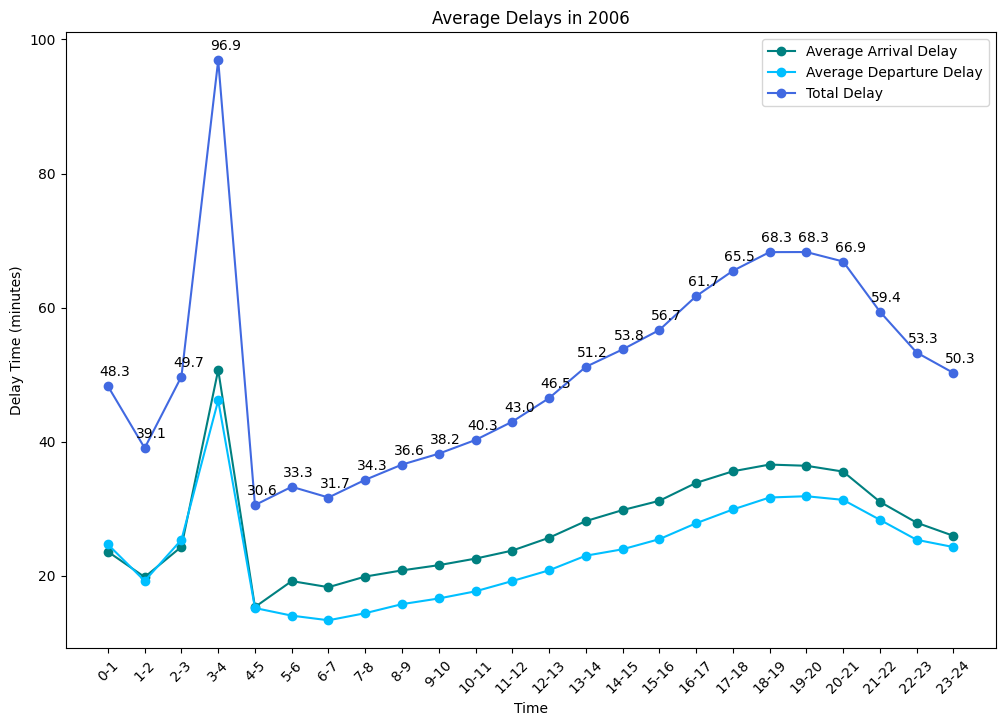

In [47]:
#creating a line graph

fig, ax = plt.subplots(figsize=[12,8])

ax.plot(avg_arrival_delay2006_byday.index, avg_arrival_delay2006_byday, label='Average Arrival Delay',marker="o",color='teal')

ax.plot(avg_departure_delay2006_byday.index, avg_departure_delay2006_byday, label='Average Departure Delay',marker="o",color='deepskyblue')

total_delay_byday = avg_arrival_delay2006_byday + avg_departure_delay2006_byday

ax.plot(total_delay_byday.index, total_delay_byday, label='Total Delay', marker="o",color='royalblue')

for x, y in zip(total_delay_byday.index, total_delay_byday):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(5, 10), textcoords='offset points', ha='center', va='center')

plt.xticks(rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Delay Time (minutes)')
ax.set_title('Average Delays in 2006')
ax.set_xticks(avg_arrival_delay2006_byday.index)
ax.set_xticks(avg_departure_delay2006_byday.index)
ax.legend()
plt.show()

In [48]:
# binning the hours of scheduled arrival time for arrival delays dataset

arrival_delays2007.loc[:, 'Hours_Binned'] = arrival_delays2007['CRSDepTime'].apply(lambda x: x // 100)
arrival_delays2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,ArrTime,ArrDelay,Hours_Binned
7141922,2007,1,1,1,1225,1340,1341.0,1.0,12
7141923,2007,1,1,1,1905,2035,2043.0,8.0,19
7141924,2007,1,1,1,2130,2300,2334.0,34.0,21
7141925,2007,1,1,1,1200,1330,1356.0,26.0,12
7141927,2007,1,1,1,1420,1550,1553.0,3.0,14
...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1605,1736,1749.0,13.0,16
14595133,2007,12,15,6,1851,2105,2110.0,5.0,18
14595134,2007,12,15,6,1025,1735,1750.0,15.0,10
14595135,2007,12,15,6,1315,1622,1658.0,36.0,13


In [49]:
departure_delays2007.loc[:, 'Hours_Binned'] = departure_delays2007['CRSDepTime'].apply(lambda x: x // 100)
departure_delays2007

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,Hours_Binned
7141922,2007,1,1,1,1225,1232.0,7.0,12
7141923,2007,1,1,1,1905,1918.0,13.0,19
7141924,2007,1,1,1,2130,2206.0,36.0,21
7141925,2007,1,1,1,1200,1230.0,30.0,12
7141926,2007,1,1,1,830,831.0,1.0,8
...,...,...,...,...,...,...,...,...
14595129,2007,12,15,6,1335,1341.0,6.0,13
14595130,2007,12,15,6,1645,1646.0,1.0,16
14595133,2007,12,15,6,1851,1902.0,11.0,18
14595135,2007,12,15,6,1315,1353.0,38.0,13


In [50]:
# giving a range and labels for the plot
range = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
labels = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'] 

In [51]:
# changing the type of the variable CRSDepTime to category

arrival_delays2007.loc[:, 'CRSDepTime'] = pd.cut(arrival_delays2007.CRSDepTime, range, labels=labels).astype('category')

departure_delays2007.loc[:,'CRSDepTime'] = pd.cut(departure_delays2007.CRSDepTime, range, labels=labels).astype('category')

In [52]:
#calculating average arrival and departure delays by scheduled Departure Time

avg_arrival_delay2007_byday = arrival_delays2007.groupby('CRSDepTime')['ArrDelay'].mean()

avg_departure_delay2007_byday = departure_delays2007.groupby('CRSDepTime')['DepDelay'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12628\2800811743.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_arrival_delay2007_byday = arrival_delays2007.groupby('CRSDepTime')['ArrDelay'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_12628\2800811743.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_departure_delay2007_byday = departure_delays2007.groupby('CRSDepTime')['DepDelay'].mean()


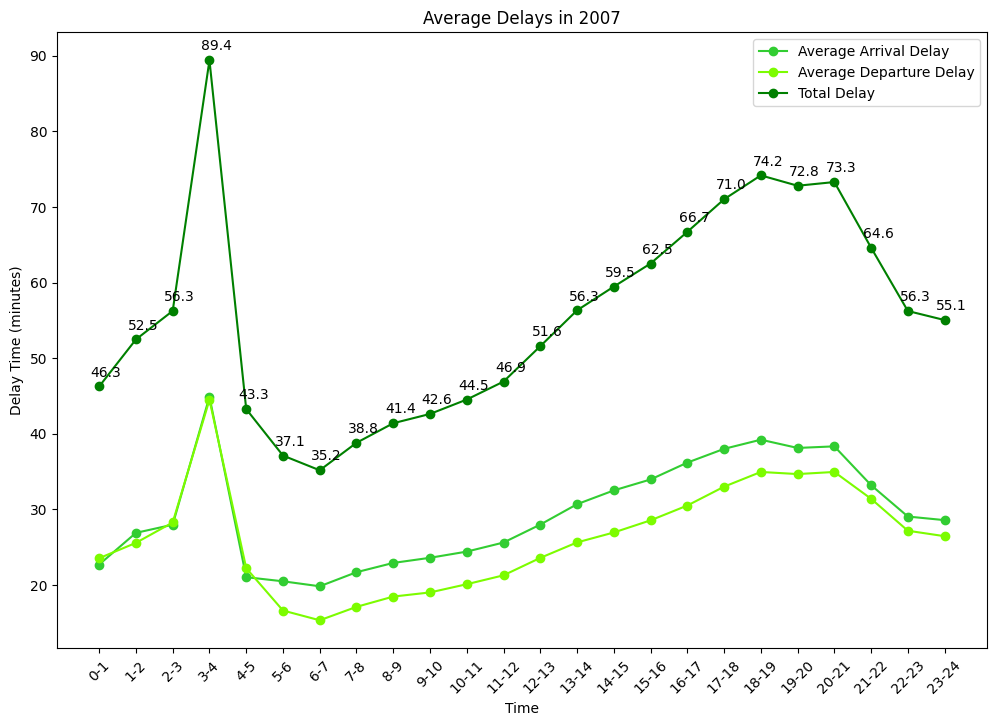

In [53]:
#creating a line graph

fig, ax = plt.subplots(figsize=[12,8])

ax.plot(avg_arrival_delay2007_byday.index, avg_arrival_delay2007_byday, label='Average Arrival Delay',marker="o",color='limegreen')

ax.plot(avg_departure_delay2007_byday.index, avg_departure_delay2007_byday, label='Average Departure Delay',marker="o",color='lawngreen')

total_delay_byday = avg_arrival_delay2007_byday + avg_departure_delay2007_byday

ax.plot(total_delay_byday.index, total_delay_byday, label='Total Delay', marker="o",color='green')

for x, y in zip(total_delay_byday.index, total_delay_byday):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(5, 10), textcoords='offset points', ha='center', va='center')

plt.xticks(rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Delay Time (minutes)')
ax.set_title('Average Delays in 2007')
ax.set_xticks(avg_arrival_delay2007_byday.index)
ax.set_xticks(avg_departure_delay2007_byday.index)
ax.legend()
plt.show()

In [54]:
# Calculating the Overall Average Delay for Departure and Arrival in both 2006 and 2007

In [55]:
delays = cleaned_dataset[['Year','Month','DayOfWeek','DepTime','DepDelay','ArrTime','ArrDelay','Total_Delay']]

In [56]:
# Drop rows with missing values
delays = delays.dropna(subset=['ArrDelay','DepDelay','Total_Delay'])

In [57]:
#  Add a new column to the dataframe that categorizes the departure time into time slots

bins = [0, 600, 1200, 1800, 2400]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
delays['TimeOfDay'] = pd.cut(delays['DepTime'], bins=bins, labels=labels, include_lowest=True)

In [58]:
# Group the data by time slot and find the average of ArrDelay, DepDelay, and Total_Delay
time_of_day = labels
avg_arr_delay = []
avg_dep_delay = []
avg_total_delay = []

for time in time_of_day:
    avg_arr_delay.append(delays[delays['TimeOfDay']==time]['ArrDelay'].mean())
    avg_dep_delay.append(delays[delays['TimeOfDay']==time]['DepDelay'].mean())
    avg_total_delay.append(delays[delays['TimeOfDay']==time]['Total_Delay'].mean())

In [59]:
# Create a table with time slot, average arrival delay, average departure delay, and average delay
delay_dataset = pd.DataFrame({'Time Of Day': time_of_day,
                         'Avg Arrival Delay': avg_arr_delay,
                         'Avg Departure Delay': avg_dep_delay,
                         'Avg Total Delay': avg_total_delay})
print(delay_dataset)

  Time Of Day  Avg Arrival Delay  Avg Departure Delay  Avg Total Delay
0       Night           8.843243            10.604970        19.448214
1     Morning           1.877135             3.231844         5.108978
2   Afternoon          10.038824            11.112748        21.151572
3     Evening          21.705334            23.108350        44.813684


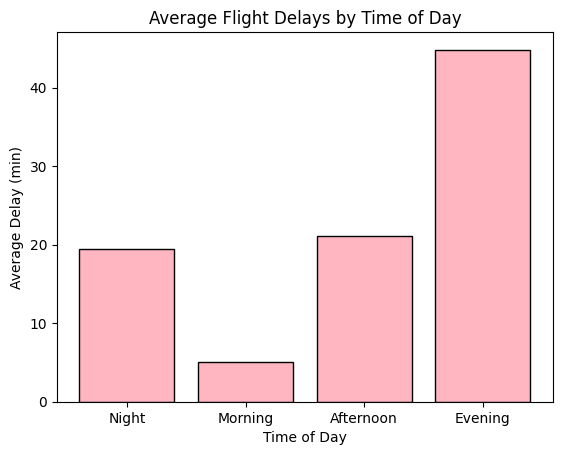

In [60]:
# Plot a bar chart to visualize the average delay by time of day

plt.bar(delay_dataset['Time Of Day'], delay_dataset['Avg Total Delay'], color = 'lightpink',edgecolor='black')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delays by Time of Day')
plt.show()

## Best Days of the Week to minimise Delays

In [61]:
# Convert the DayOfWeek column to a string for easier readability
delays['DayOfWeek'] = delays['DayOfWeek'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                     4: 'Thursday', 5: 'Friday', 6: 'Saturday',
                                                     7: 'Sunday'})

In [62]:
#calculating average arrival and departure delays by Day Of Week in 2006

avg_arrival_delay2006_byweek = arrival_delays2006.groupby('DayOfWeek')['ArrDelay'].mean()

avg_departure_delay2006_byweek = departure_delays2006.groupby('DayOfWeek')['DepDelay'].mean()

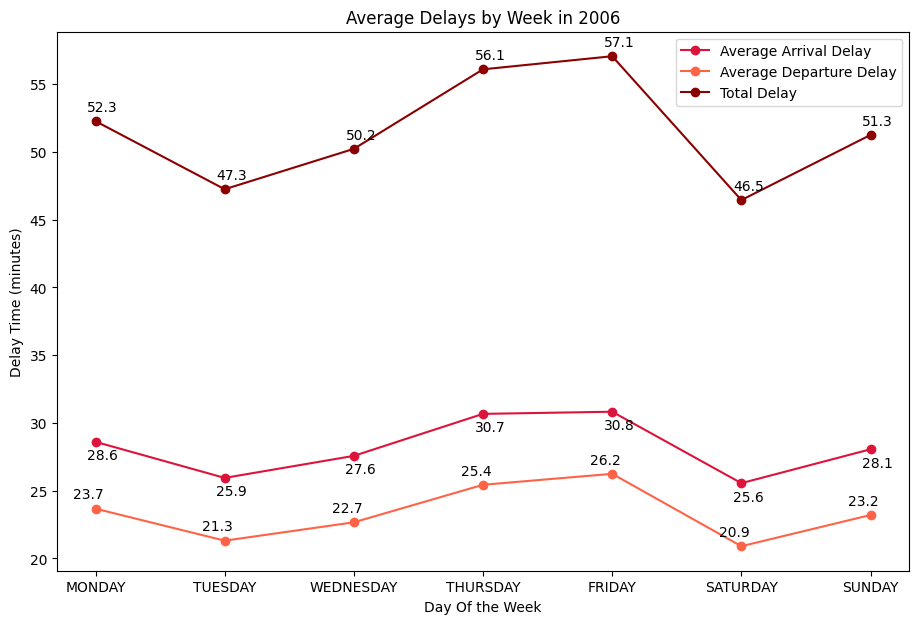

In [63]:
#Creating a line graph for day of week against arrival and departure delay times in 2006

fig, ax = plt.subplots(figsize=[11,7])

ax.plot(avg_arrival_delay2006_byweek.index, avg_arrival_delay2006_byweek, label='Average Arrival Delay',marker="o", color='crimson')
ax.plot(avg_departure_delay2006_byweek.index, avg_departure_delay2006_byweek, label='Average Departure Delay',marker="o", color='tomato')

total_delay2006_byweek = avg_arrival_delay2006_byweek + avg_departure_delay2006_byweek
ax.plot(total_delay2006_byweek.index, total_delay2006_byweek, label='Total Delay', marker="o", color='darkred')

for x, y in zip(avg_arrival_delay2006_byweek.index, avg_arrival_delay2006_byweek):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(5, -10), textcoords='offset points', ha='center', va='center')

for x, y in zip(avg_departure_delay2006_byweek.index, avg_departure_delay2006_byweek):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(-5, 10), textcoords='offset points', ha='center', va='center')

for x, y in zip(total_delay2006_byweek.index, total_delay2006_byweek):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(5, 10), textcoords='offset points', ha='center', va='center')

ax.set_xlabel('Day Of the Week')
ax.set_ylabel('Delay Time (minutes)')
ax.set_title('Average Delays by Week in 2006')
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(["MONDAY","TUESDAY","WEDNESDAY","THURSDAY","FRIDAY","SATURDAY","SUNDAY"])
ax.legend()
plt.show()

In [64]:
#calculating average arrival and departure delays by Day Of Week in 2007

avg_arrival_delay2007_byweek = arrival_delays2007.groupby('DayOfWeek')['ArrDelay'].mean()

avg_departure_delay2007_byweek = departure_delays2007.groupby('DayOfWeek')['DepDelay'].mean()

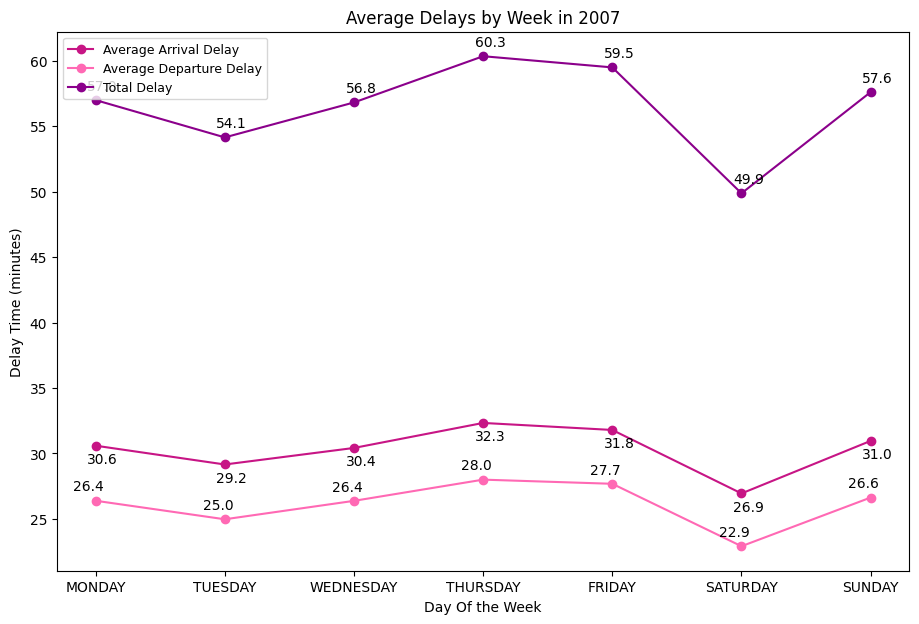

In [65]:
#Creating a line graph for day of week against arrival and departure delay times in 2007

fig, ax = plt.subplots(figsize=[11,7])

ax.plot(avg_arrival_delay2007_byweek.index, avg_arrival_delay2007_byweek, label='Average Arrival Delay',marker="o", color='mediumvioletred')
ax.plot(avg_departure_delay2007_byweek.index, avg_departure_delay2007_byweek, label='Average Departure Delay',marker="o", color='hotpink')

total_delay2007_byweek = avg_arrival_delay2007_byweek + avg_departure_delay2007_byweek
ax.plot(total_delay2007_byweek.index, total_delay2007_byweek, label='Total Delay', marker="o", color='darkmagenta')

for x, y in zip(avg_arrival_delay2007_byweek.index, avg_arrival_delay2007_byweek):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(5, -10), textcoords='offset points', ha='center', va='center')

for x, y in zip(avg_departure_delay2007_byweek.index, avg_departure_delay2007_byweek):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(-5, 10), textcoords='offset points', ha='center', va='center')

for x, y in zip(total_delay2007_byweek.index, total_delay2007_byweek):
    ax.annotate(f"{y:.1f}", xy=(x, y), xytext=(5, 10), textcoords='offset points', ha='center', va='center')

ax.set_xlabel('Day Of the Week')
ax.set_ylabel('Delay Time (minutes)')
ax.set_title('Average Delays by Week in 2007')
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(["MONDAY","TUESDAY","WEDNESDAY","THURSDAY","FRIDAY","SATURDAY","SUNDAY"])
ax.legend(fontsize =9)
plt.show()

In [66]:
# Calculating the overall average delay by week, for departure and arrival in both 2006 and 2007

delays['DepDelay'] = delays['DepDelay'].fillna(0)
delays['ArrDelay'] = delays['ArrDelay'].fillna(0)

delays['Avg Departure Delay'] = delays.groupby('DayOfWeek')['DepDelay'].transform('mean')
delays['Avg Arrival Delay'] = delays.groupby('DayOfWeek')['ArrDelay'].transform('mean')
delays['Avg Total Delay'] = (delays['Total_Delay']).groupby(delays['DayOfWeek']).transform('mean')


In [67]:
# Create a table with the day of the week, average arrival delay, average departure delay, and average delay
delay_table = delays.groupby('DayOfWeek', as_index=False).agg({
    'Avg Arrival Delay': 'mean',
    'Avg Departure Delay': 'mean',
    'Avg Total Delay': 'mean'
})

In [68]:
# Create a DataFrame with all days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
all_days = pd.DataFrame({'DayOfWeek': days_of_week})

In [69]:
# Merge the all_days DataFrame with the Delay_Table

delay_table = pd.merge(all_days, delay_table, on= 'DayOfWeek', how='left')
print(delay_table)

   DayOfWeek  Avg Arrival Delay  Avg Departure Delay  Avg Total Delay
0     Monday           9.701637            11.106441        20.808078
1    Tuesday           7.248411             8.532385        15.780797
2  Wednesday           8.987954             9.771908        18.759863
3   Thursday          12.141524            12.314941        24.456465
4     Friday          12.701676            13.299041        26.000717
5   Saturday           5.513355             8.620817        14.134172
6     Sunday           9.247222            11.074626        20.321849


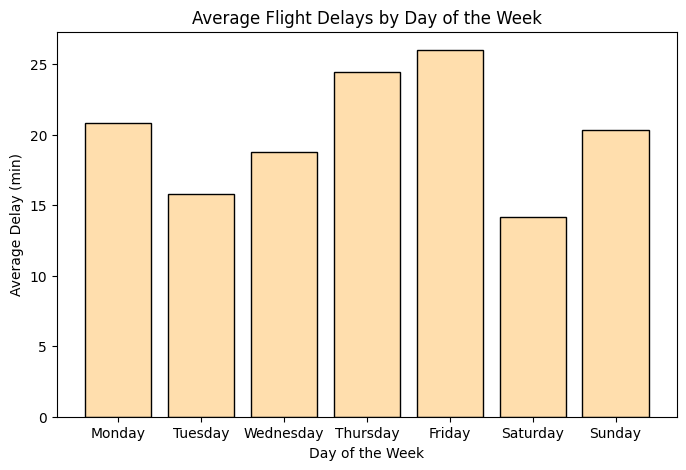

In [70]:
plt.figure(figsize=(8, 5))
plt.bar(delay_table['DayOfWeek'], delay_table['Avg Total Delay'], color = 'navajowhite', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delays by Day of the Week')
plt.show()

## Best Times of the Week to minimise Delays

**For Delays in 2006:**

In [71]:
delays2_2006 = delays2_2006.copy()
delays2_2006['Hours_Binned'] = arrival_delays2006['Hours_Binned']
delays2_2006.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay,Hours_Binned
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,0,0,0,0,0,0,4.0,7.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,19,0,0,0,0,0,0,0,-5.0,NaN
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,0,0,0,0,0,0,-23.0,NaN
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,10,0,0,0,0,0,0,0,-10.0,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,0,0,0,0,0,0,-8.0,8.0


In [72]:
#Renaming "DayofMonth" column to "Day"

delays2_2006.rename(columns={'DayofMonth': 'Day'}, inplace=True)
delays2_2006.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay,Hours_Binned
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,0,0,0,0,0,0,4.0,7.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,19,0,0,0,0,0,0,0,-5.0,NaN
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,0,0,0,0,0,0,-23.0,NaN
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,10,0,0,0,0,0,0,0,-10.0,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,0,0,0,0,0,0,-8.0,8.0


In [73]:
#Extracting day of the week and hour of the day

delays2_2006['DayOfWeek'] = pd.to_datetime(delays2_2006[['Year', 'Month', 'Day']]).dt.dayofweek
delays2_2006['Hours_Binned'] = delays2_2006['CRSDepTime'] // 100 

In [74]:
# Calculating average arrival and departure delay for each hour of the day, Monday to Sunday

avg_arrival_delay2006 = delays2_2006.groupby(['DayOfWeek', 'Hours_Binned'])['ArrDelay'].mean().reset_index()

avg_departure_delay2006 = delays2_2006.groupby(['DayOfWeek', 'Hours_Binned'])['DepDelay'].mean().reset_index()

In [75]:
# Calculate total average delay for each hour of the day, Monday to Sunday

total_delay2006 = delays2_2006.groupby(['DayOfWeek', 'Hours_Binned'])['Total_Delay'].mean().reset_index()

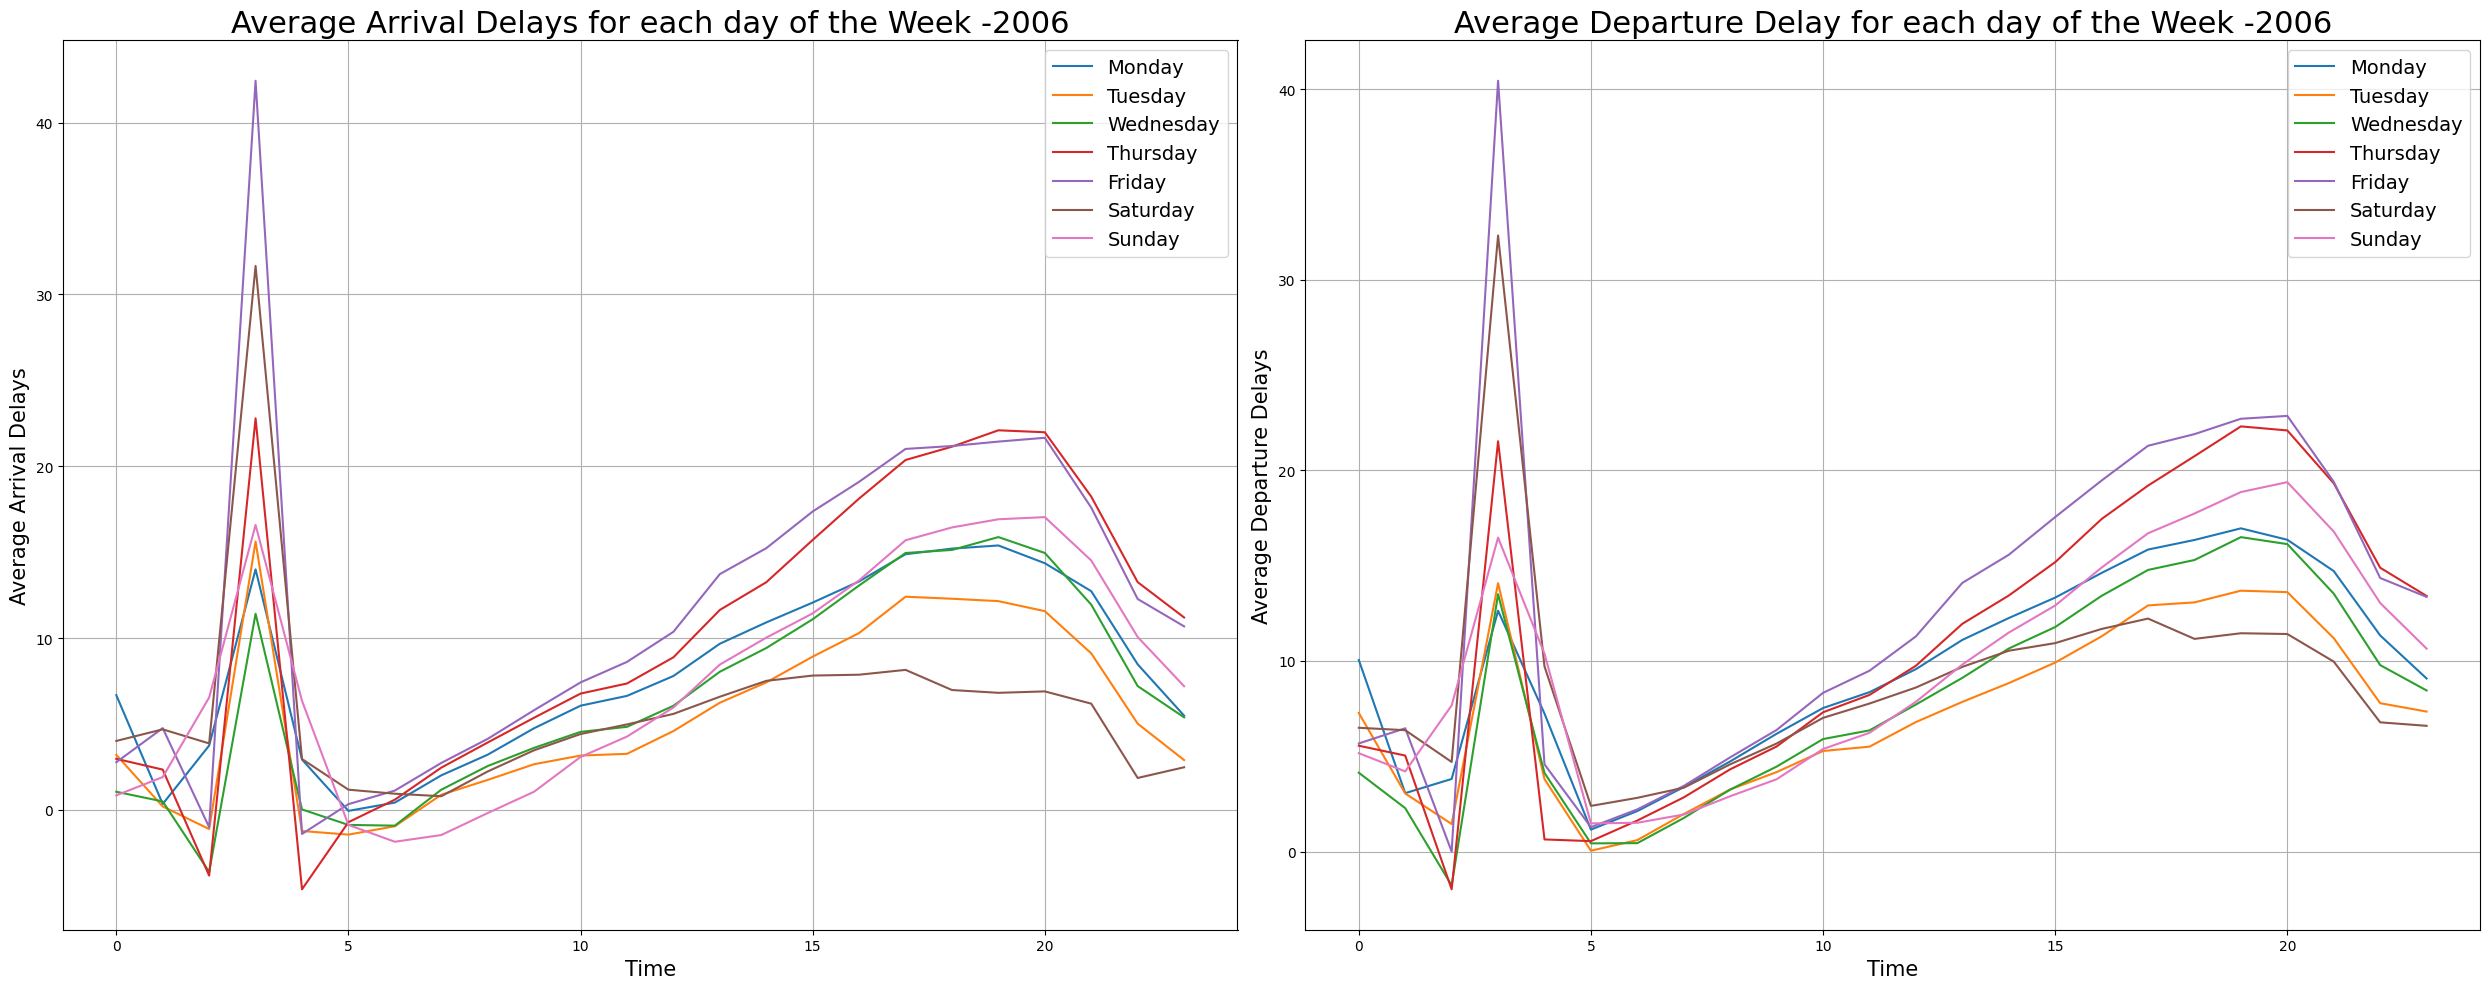

In [96]:
fig, axs = plt.subplots(1, 2, figsize= (25, 10))

# Define the mapping for day of the week to labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot average arrival delay
for day, day_name in enumerate(day_labels):
    day_data = avg_arrival_delay2006[avg_arrival_delay2006['DayOfWeek'] == day]
    axs[0].plot(day_data['Hours_Binned'], day_data['ArrDelay'], label=day_name)

axs[0].set_title('Average Arrival Delays for each day of the Week -2006', fontsize=22)
axs[0].set_xlabel('Time', fontsize=15)
axs[0].set_ylabel('Average Arrival Delays', fontsize=15)
axs[0].legend(fontsize=14)

axs[0].grid(True)

# Plot average departure delay
for day, day_name in enumerate(day_labels):
    day_data = avg_departure_delay2006[avg_departure_delay2006['DayOfWeek'] == day]
    axs[1].plot(day_data['Hours_Binned'], day_data['DepDelay'], label=day_name)


axs[1].set_title('Average Departure Delay for each day of the Week -2006',fontsize=22)
axs[1].set_xlabel('Time',fontsize=15)
axs[1].set_ylabel('Average Departure Delays',fontsize=15)
axs[1].legend(loc='upper right',fontsize=14)

axs[1].grid(True)

plt.tight_layout()
plt.show()

**For delays in 2007:**

In [77]:
delays2_2007 = delays2_2007.copy()
delays2_2007['Hours_Binned'] = arrival_delays2007['Hours_Binned']
delays2_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay,Hours_Binned
7141922,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,11,0,0,0,0,0,0,0,8.0,12.0
7141923,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,6,0,0,0,0,0,0,0,21.0,19.0
7141924,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,9,0,0,3,0,0,0,31,70.0,21.0
7141925,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,8,0,0,23,0,0,0,3,56.0,12.0
7141926,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,9,0,0,0,0,0,0,0,-2.0,NaN


In [78]:
#Renaming "DayofMonth" column to "Day"

delays2_2007.rename(columns={'DayofMonth': 'Day'}, inplace=True)
delays2_2007.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay,Hours_Binned
7141922,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,11,0,0,0,0,0,0,0,8.0,12.0
7141923,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,6,0,0,0,0,0,0,0,21.0,19.0
7141924,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,9,0,0,3,0,0,0,31,70.0,21.0
7141925,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,8,0,0,23,0,0,0,3,56.0,12.0
7141926,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,9,0,0,0,0,0,0,0,-2.0,NaN


In [79]:
# Calculating average arrival delay for each hour of the day, Monday to Sunday

avg_arrival_delay2007 = delays2_2007.groupby(['DayOfWeek', 'Hours_Binned'])['ArrDelay'].mean().reset_index()

avg_departure_delay2007 = delays2_2007.groupby(['DayOfWeek', 'Hours_Binned'])['DepDelay'].mean().reset_index()

In [80]:
# Calculate total average delay for each hour of the day, Monday to Sunday

total_delay2007 = delays2_2007.groupby(['DayOfWeek', 'Hours_Binned'])['Total_Delay'].mean().reset_index()

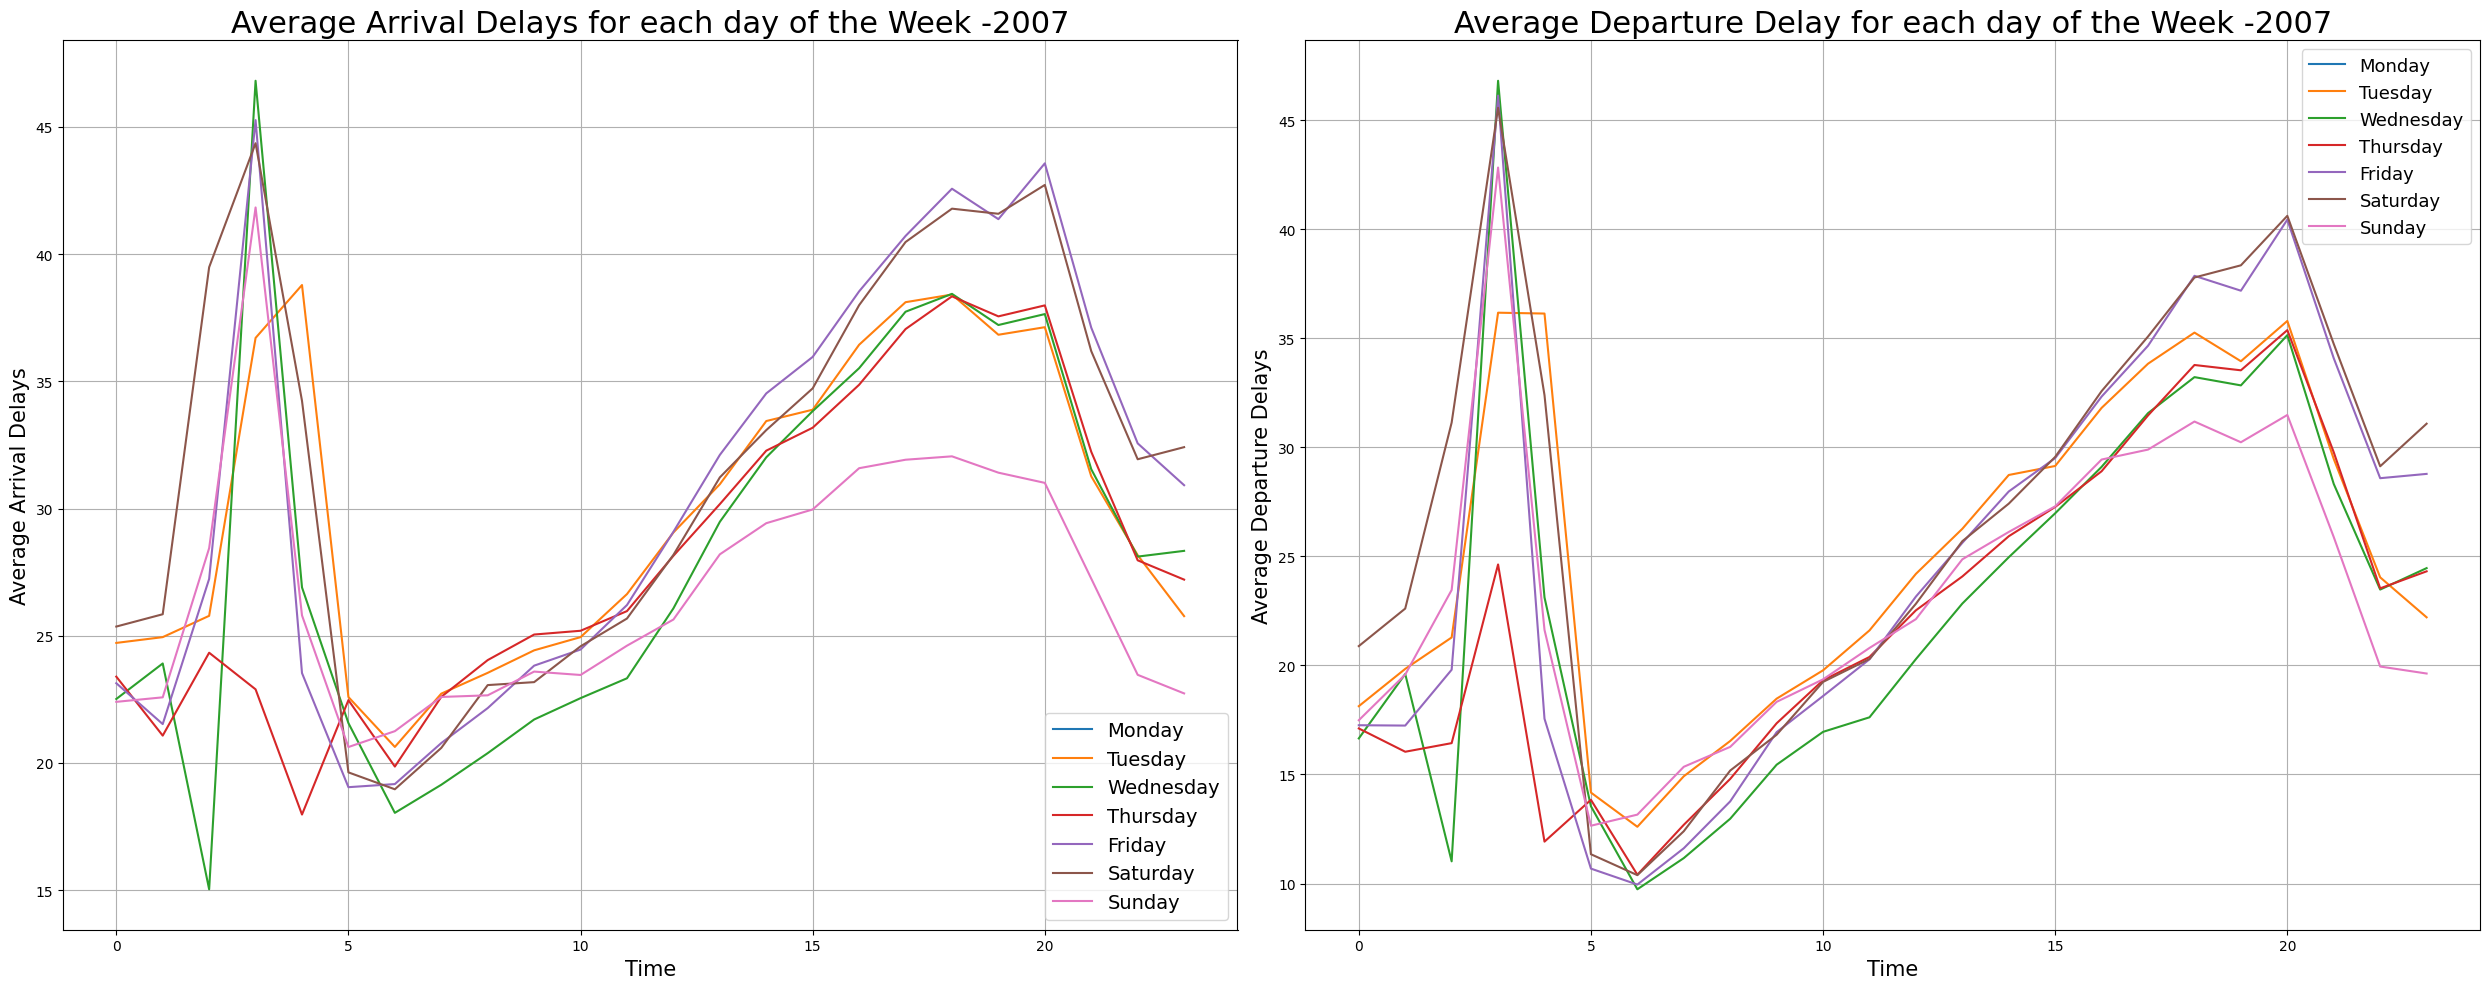

In [81]:
fig, axs = plt.subplots(1, 2, figsize= (25, 10))

# Define the mapping for day of the week to labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot average arrival delay
for day, day_name in enumerate(day_labels):
    day_data = avg_arrival_delay2007[avg_arrival_delay2007['DayOfWeek'] == day]
    axs[0].plot(day_data['Hours_Binned'], day_data['ArrDelay'], label=day_name)

axs[0].set_title('Average Arrival Delays for each day of the Week -2007',fontsize=22)
axs[0].set_xlabel('Time',fontsize=15)
axs[0].set_ylabel('Average Arrival Delays',fontsize=15)
axs[0].legend(fontsize=14)
axs[0].grid(True)

# Plot average departure delay
for day, day_name in enumerate(day_labels):
    day_data = avg_departure_delay2007[avg_departure_delay2007['DayOfWeek'] == day]
    axs[1].plot(day_data['Hours_Binned'], day_data['DepDelay'], label=day_name)

axs[1].set_title('Average Departure Delay for each day of the Week -2007',fontsize=22)
axs[1].set_xlabel('Time',fontsize=15)
axs[1].set_ylabel('Average Departure Delays',fontsize=15)
axs[1].legend(loc='upper right',fontsize=13)
axs[1].grid(True)

plt.tight_layout()
plt.show()

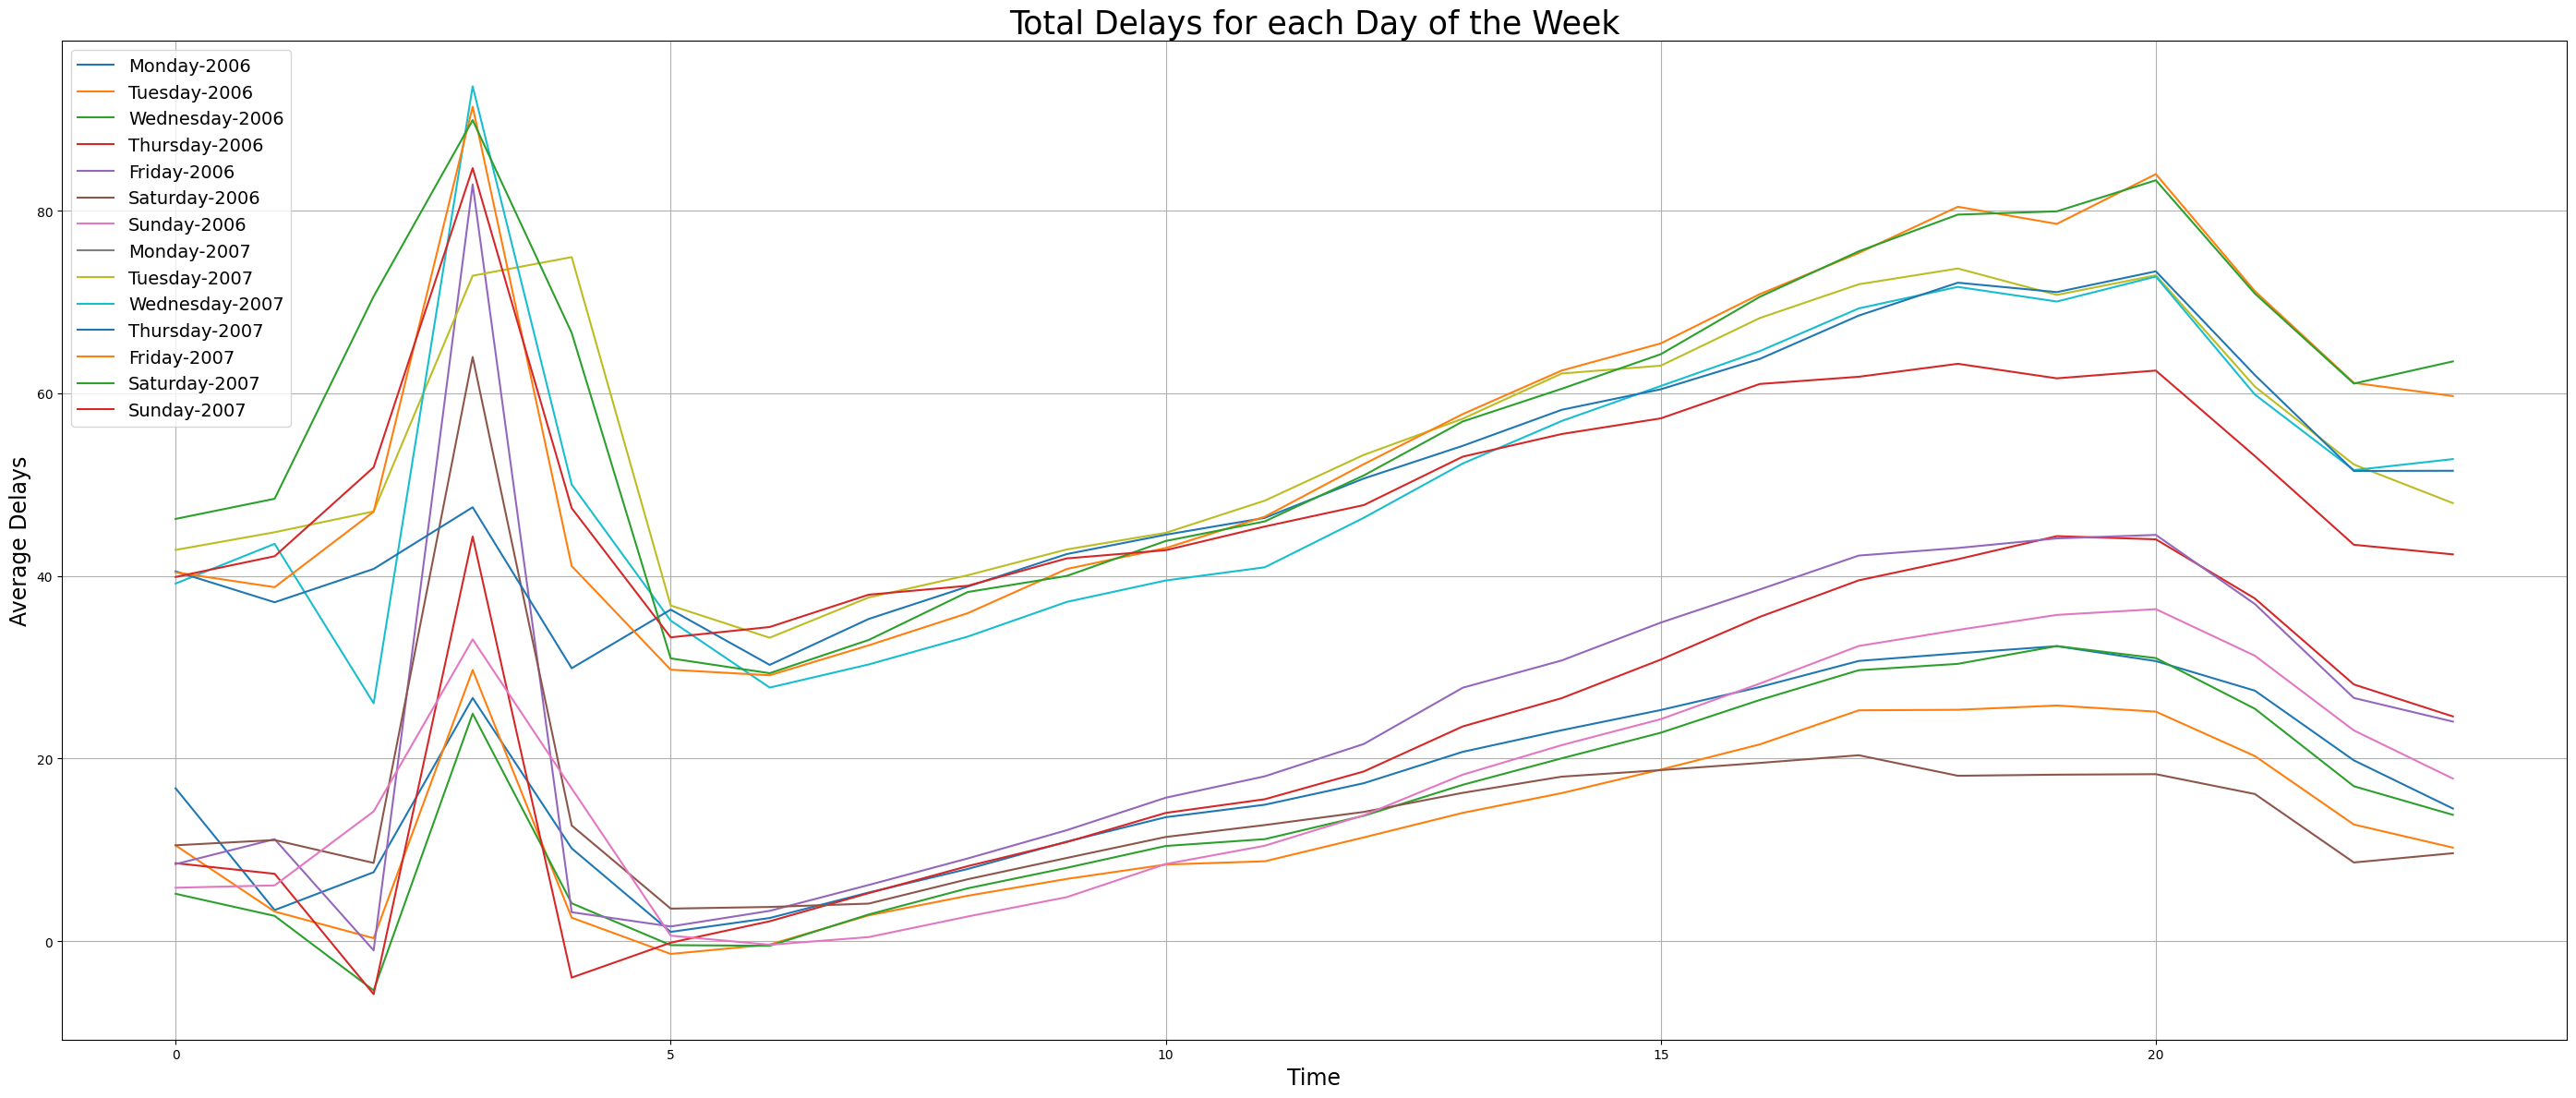

In [82]:
#Total Delays:

fig, axs = plt.subplots(1, 1, figsize=(28, 12))

# Define the mapping for day of the week to labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Total Delays in 2006
for day, day_name in enumerate(day_labels):
    day_data = total_delay2006[total_delay2006['DayOfWeek'] == day]
    axs.plot(day_data['Hours_Binned'], day_data['Total_Delay'], label=f'{day_name}-2006')

# Plot Total Delays in 2007
for day, day_name in enumerate(day_labels):
    day_data =total_delay2007[total_delay2007['DayOfWeek'] == day]
    axs.plot(day_data['Hours_Binned'], day_data['Total_Delay'], label=f'{day_name}-2007')

axs.set_title('Total Delays for each Day of the Week', fontsize=25)
axs.set_xlabel('Time', fontsize=17, )
axs.set_ylabel('Average Delays', fontsize=17)
axs.legend(fontsize=14)
axs.grid(True)

plt.tight_layout()
plt.show()